## Lecture 30 -- Example IB
Plot the system demand curve for the pipeline


In [100]:
# boilerplate
import numpy as np
import sys
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
# Given variables
L = 100 # m
Q = 6e-3 # m^3/s
h_pump = 32. # m

# Values from Deen Table 2.2 and 12.1
k = 0.26e-3 # m (effective roughness)
K = 3.11 # minor losses

# properties/constants
rho = 1e3 # kg/m^3
mu = 1e-3 # kg/m/s (water, viscosity)
g = 9.807 #m^2/s (gravitational const)

In [102]:
# head loss
def hL( D ):
    
    # average velocity
    U = 4*Q/np.pi/D**2
    
    # Reynolds number
    Re = rho*U*D/mu
    
    # friction factor
    f = (3.6 * np.log10(6.9/Re + (k/D/3.7)**(1.11)) )**(-2) 
    
    return U**2/(2*g)*(4*L*f/D + K)

# h_L - DP/rho/g = 0
def f1(x):
    return hL(x)-h_pump

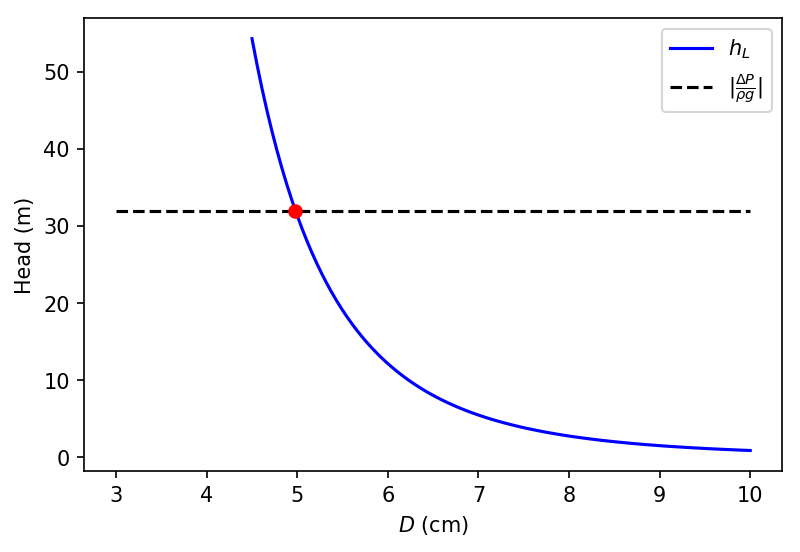

In [107]:
# --------------------------------------
# Plot system demand curve
# --------------------------------------
D = np.linspace(4.5e-2, 1e-1, 101)
D_solution = fsolve(f1, 0.05)

plt.figure(dpi=150)
plt.plot(D*1e2, hL(D), 'b-', label='$h_{L}$')
plt.plot([3, 10], [h_pump, h_pump], 'k--', \
         label='$|\\frac{\Delta P}{\\rho g}|$')
plt.plot(D_solution*1e2, hL(D_solution), 'ro')
plt.legend()
plt.xlabel('$D$ (cm)')
plt.ylabel('Head (m)')
plt.show();